# Linear Regression with Tensorflow

- Here we will try to implement Linear Regression using Tensorflow and will implement different methoda to get the optimized solution

    1. by matrix inverse method
    2. by decomposition method
    3. Tensorflow way
    4. Getting loss functions 
    5. Deming Regression
    6. Lasso and Ridge regression
    7. Elastic net regression

- [different ols solution](https://stats.stackexchange.com/a/1882/279934)
- Few others are 
  - [SVD](https://programmathically.com/singular-value-decomposition/) and [link2](https://machinelearningmastery.com/singular-value-decomposition-for-machine-learning/) and [calculation example](https://web.mit.edu/be.400/www/SVD/Singular_Value_Decomposition.htm) and [libraries](https://www.askpython.com/python/examples/singular-value-decomposition)
  
  - [QR Decomposition](https://towardsdatascience.com/qr-matrix-factorization-15bae43a6b2)


## 1. Using Matrix inverse method (Normal Equations)

Equation : 
    $Ax = b$  where A and b are the inputs and outputs respectively

solution : 
    $x= (A^T *A)^{-1}* (A^T * B)$

- extras
  - [link 1](https://online.stat.psu.edu/stat462/node/132/)
  - [link 2](https://machinelearningmastery.com/solve-linear-regression-using-linear-algebra/)
  - [problem with inverse method](https://stats.stackexchange.com/a/69537/279934)


In [73]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import tensorflow as tf

In [74]:
# Preparing x and y
x= np.linspace(10,100,50)
y= 10 * (x + np.random.normal(0,1,50))


In [75]:
# Creating Matrix A and B

x_vals= np.transpose(np.matrix(x))
ones= np.transpose(np.matrix(np.ones(50)))  # np.repeat(1,50)

A_mat = np.concatenate((x_vals, ones), axis=1)  # np.column_stack((x,ones))
b_mat= np.matrix(y).T 

A_mat.shape, b_mat.shape

((50, 2), (50, 1))

In [76]:
# Creating tensors

A_tensor= tf.constant(A_mat)
B_tensor= tf.constant(b_mat)

In [77]:
# using matrix inverse method

mul = tf.matmul(A_tensor, A_tensor, transpose_a=True)
mul_inv= tf.linalg.inv(mul)  # (A.T * A ) ^-1

sol= tf.matmul( mul_inv, tf.matmul(A_tensor, B_tensor, transpose_a=True))
sol.numpy()

array([[9.93763328],
       [3.50092532]])

In [78]:
slope= sol[0][0]
intercept= sol[1][0]

slope, intercept

(<tf.Tensor: shape=(), dtype=float64, numpy=9.93763328076058>,
 <tf.Tensor: shape=(), dtype=float64, numpy=3.5009253231214643>)

In [79]:
preds= (slope * x + intercept)
preds.shape

TensorShape([50])

In [80]:
# r-squared and mean-absolute-error
from sklearn.metrics import mean_absolute_error, r2_score 

r2_score(y, preds), mean_absolute_error(y, preds)

(0.9979520863092396, 9.558590307787883)

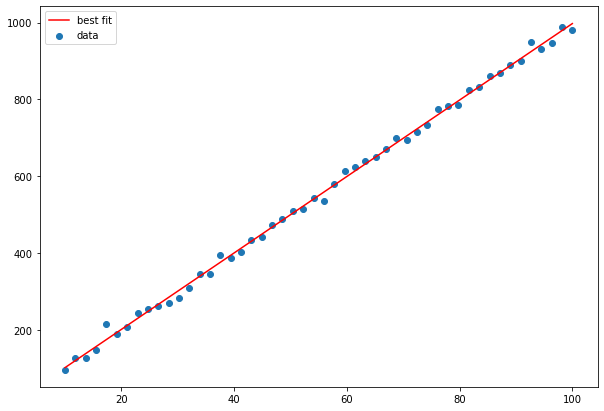

In [81]:
plt.figure(figsize=(10,7))
plt.scatter(x,y, label="data")
plt.plot(x,preds , "r-", label="best fit")
plt.legend()
plt.show()

## 2.  Using Cholesky decomposition method

- Compute the Cholesky decomposition of $A$, where $A \cdot A^{T} = L^{T} \cdot L$.  ( [link](https://en.wikipedia.org/wiki/Cholesky_decomposition) and [link2](https://numpy.org/doc/stable/reference/generated/numpy.linalg.cholesky.html) )
- Solve ($L^{T} \cdot z = A^{T} \cdot y$) for $z$.
- Finally, solve ($L \cdot x = z$) for $x$.

Note - Normally decomposition works when $A$ is square. Of course, with an over determined system, $A$ is not square. So we factor the product $A^{T} \cdot A$ instead

In [82]:
# we have already our previous tensors 
A_tensor.shape, B_tensor.shape

(TensorShape([50, 2]), TensorShape([50, 1]))

In [83]:
# Find the Cholesky Decomposition
tA_A = tf.matmul(tf.transpose(A_tensor), A_tensor)
L = tf.linalg.cholesky(tA_A)
L

<tf.Tensor: shape=(2, 2), dtype=float64, numpy=
array([[431.71466389,   0.        ],
       [  6.36994809,   3.06981454]])>

In [84]:
# doing step-2 L * y= T(A) * B
prod= tf.matmul(tf.transpose(A_tensor), B_tensor)

y_sol = tf.linalg.solve(L, prod)
y_sol 

<tf.Tensor: shape=(2, 1), dtype=float64, numpy=
array([[4312.52272428],
       [  10.74719145]])>

In [88]:
# Solve L' * x = y
x_sol = tf.linalg.solve(tf.transpose(L), y_sol)
x_sol

<tf.Tensor: shape=(2, 1), dtype=float64, numpy=
array([[9.93763328],
       [3.50092532]])>

In [ ]:
# Extract coefficients
slope = x_sol[0][0]
y_intercept = x_sol[1][0]

preds= slope * x + intercept
preds 

<tf.Tensor: shape=(50,), dtype=float64, numpy=
array([  99.77645225,  118.16343458,  136.55041691,  154.93739924,
        173.32438157,  191.7113639 ,  210.09834623,  228.48532856,
        246.87231089,  265.25929322,  283.64627555,  302.03325788,
        320.42024021,  338.80722255,  357.19420488,  375.58118721,
        393.96816954,  412.35515187,  430.7421342 ,  449.12911653,
        467.51609886,  485.90308119,  504.29006352,  522.67704585,
        541.06402818,  559.45101051,  577.83799284,  596.22497518,
        614.61195751,  632.99893984,  651.38592217,  669.7729045 ,
        688.15988683,  706.54686916,  724.93385149,  743.32083382,
        761.70781615,  780.09479848,  798.48178081,  816.86876314,
        835.25574547,  853.64272781,  872.02971014,  890.41669247,
        908.8036748 ,  927.19065713,  945.57763946,  963.96462179,
        982.35160412, 1000.73858645])>

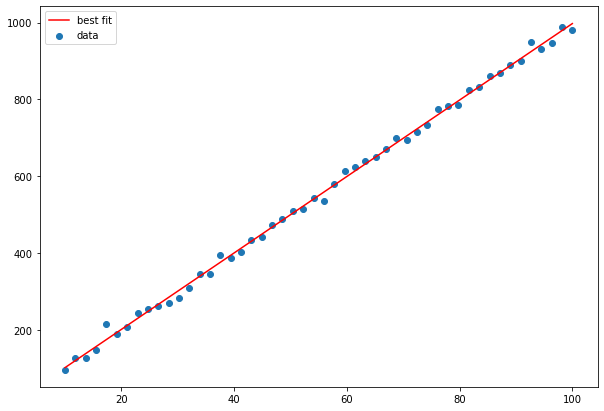

In [86]:
plt.figure(figsize=(10,7))
plt.scatter(x,y, label="data")
plt.plot(x,preds , "r-", label="best fit")
plt.legend()
plt.show()

In [87]:
# r-squared and mean-absolute-error
from sklearn.metrics import mean_absolute_error, r2_score 

r2_score(y, preds), mean_absolute_error(y, preds)

(0.9979520863092396, 9.558590307787883)

## Using Tensorflow : IRIS Dataset

- With the Sepal length (y) and Petal width (x) of the Iris data.



In [90]:
from sklearn.datasets import load_iris

iris= load_iris()
x_valss = np.array([x[3] for x in iris.data])
y_valss = np.array([y[0] for y in iris.data])


In [91]:
# Declare batch size
batch_size = 25

In [92]:
from tensorflow import keras

model= keras.Sequential([
    keras.layers.Dense(2),
    keras.layers.Dense(1)
])

model.compile(optimizer="SGD", loss="mse")

model.fit(x_valss, y_valss, batch_size, epochs=50, validation_split=0.25)

Epoch 1/50
5/5 [==============================] - 0s 51ms/step - loss: 10.1513 - val_loss: 1.5926
Epoch 2/50
5/5 [==============================] - 0s 8ms/step - loss: 4.7054 - val_loss: 4.1202
Epoch 3/50
5/5 [==============================] - 0s 7ms/step - loss: 3.7143 - val_loss: 2.9923
Epoch 4/50
5/5 [==============================] - 0s 7ms/step - loss: 3.1719 - val_loss: 4.4577
Epoch 5/50
5/5 [==============================] - 0s 7ms/step - loss: 2.6878 - val_loss: 3.7155
Epoch 6/50
5/5 [==============================] - 0s 7ms/step - loss: 2.3375 - val_loss: 2.9167
Epoch 7/50
5/5 [==============================] - 0s 7ms/step - loss: 2.0474 - val_loss: 3.6605
Epoch 8/50
5/5 [==============================] - 0s 7ms/step - loss: 1.8124 - val_loss: 3.2951
Epoch 9/50
5/5 [==============================] - 0s 7ms/step - loss: 1.5937 - val_loss: 2.4517
Epoch 10/50
5/5 [==============================] - 0s 7ms/step - loss: 1.4023 - val_loss: 1.9406
Epoch 11/50
5/5 [====================

In [93]:
preds= model.predict(x_valss)

r2_score(y_valss, preds)

0.6591560048840688